In [5]:
import cf_xarray
import gribberish
import xarray as xr

ds = xr.open_dataset('./hrrr.t23z.wrfsubhf01.grib2', engine='gribberish', only_vars=['prate', 'ugrd', 'vgrd', 'tmp'], filter_by_attrs={'generating_process': 'forecast', 'statistical_process': 'average'})
ds

type: open_dataset() got an unexpected keyword argument 'only_vars'

CPU times: user 1.41 s, sys: 114 ms, total: 1.53 s
Wall time: 1.55 s


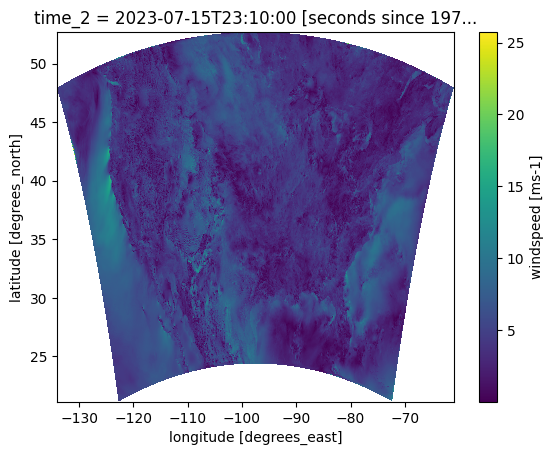

In [3]:
%%time
ds.wind.cf.isel(time=0).plot(x='longitude', y='latitude')

In [4]:
import pyproj
to_xy = pyproj.Transformer.from_crs('epsg:4326', ds.wind.crs, always_xy=True).transform

In [5]:
lat, lng = 41.42717976016072, -71.462122760827

x_sel, y_sel = to_xy(lng, lat)

lat_selected = ds['latitude'].sel(x=x_sel, y=y_sel, method='nearest')
print(lat_selected.values)

lng_selected = ds['longitude'].sel(x=x_sel, y=y_sel, method='nearest')
print(lng_selected.values)

selected = ds['apcp'].sel(x=x_sel, y=y_sel, method='nearest')
selected.values

41.41992272540395
-71.47008808568133


array([0.001, 0.   , 0.   , 0.   ])